In [ ]:
# Jupyter notebook for classification models (Logistic Regression and Random Forest) - Phase 2
# CSC691 Final Project
# PaceMakers: Predicting Average Heart Rate for Bike Rides
# Patrick, Esteban, Sarah
# 12/2/19

In [1]:
# Reference for building Logistic Regression model: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import pandas as pd

In [2]:
# Please update the path to the activities.csv file from the repository
df = pd.read_csv('activities.csv')

In [3]:
df.head()

,Date,Name,Type,Moving Time,Distance (km),Elevation Gain (m),Avg Moving Speed (kph),Avg Pace (/km),Calories,Best 20min Speed (kph),...,HRSS / h,Best 20min HR (bpm),Cadence Avg Moving (rpm or spm),Avg Watts (w),Avg Watts / Kilograms (w/kg),Best 20min Power (w),Power Stress Score,Power Stress Score / h,Athlete Settings,Delete
0,2019-09-22T16:27:01-04:00,Último día de verano,Ride,01:58:06,62.5,589.0,31.7,01:53,1772,34,...,73,163,95,179,2.56,201,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
1,2019-09-21T11:57:23-04:00,Dos loops,Ride,02:38:51,80.1,890.0,28.7,02:05,2432,36.7,...,77,173,89,174,2.49,225,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
2,2019-09-20T17:55:47-04:00,Con poco tiempo,Ride,01:07:52,35.2,314.0,30.9,01:56,1029,34.5,...,76,163,91,169,2.42,188,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
3,2019-09-19T23:45:00-04:00,Complimentary calisthenics,Workout,01:00:00,0.0,0.0,-,-,-,-,...,-,-,-,-,-,-,-,-,Weight 70kg.,NaN
4,2019-09-18T17:41:48-04:00,Afternoon Ride,Ride,01:26:05,45.6,447.0,31.4,01:54,1326,36,...,81,173,97,181,2.59,221,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN


In [4]:
# Before feature pre-processing
df.describe()

,Distance (km),Elevation Gain (m),Delete
count,573.000000,573.000000,0.0
mean,35.888656,620.718325,NaN
std,29.855291,601.756726,NaN
min,0.000000,0.000000,NaN
25%,9.300000,189.400000,NaN
50%,32.900000,526.000000,NaN
75%,51.900000,884.600000,NaN
max,170.600000,3617.000000,NaN


## Data Preprocessing

In [5]:
# Select features and rename columns
df = df[['Avg HR (bpm)','Date','Type','Distance (km)','Avg Pace (/km)','Calories','HRSS','Elevation Gain (m)']]
df = df.rename(columns={"Avg HR (bpm)": "AvgHR"})
df.head()

,AvgHR,Date,Type,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
0,158,2019-09-22T16:27:01-04:00,Ride,62.5,01:53,1772,144,589.0
1,158,2019-09-21T11:57:23-04:00,Ride,80.1,02:05,2432,217,890.0
2,159,2019-09-20T17:55:47-04:00,Ride,35.2,01:56,1029,87,314.0
3,-,2019-09-19T23:45:00-04:00,Workout,0.0,-,-,-,0.0
4,161,2019-09-18T17:41:48-04:00,Ride,45.6,01:54,1326,119,447.0


In [6]:
# Define features and pre-process data for final dataset
from dateutil.parser import parse
# Filter rows to include only those with AvgHR
df = df[df.AvgHR != '-']
# Only include Ride and VirtualRide types
types = ['Ride', 'VirtualRide']
df = df[df.Type.isin(types)]

df = df.reset_index(drop=True)
# Convert features to numbers
df["AvgHR"] = pd.to_numeric(df["AvgHR"])
df["Calories"] = pd.to_numeric(df["Calories"])
df["HRSS"] = pd.to_numeric(df["HRSS"])
df.head()
# Convert Avg Pace to seconds, parse Date and Time as separate columns
for i in range(df.shape[0]):
    #print('done')
    #print(df.loc[i,'Avg Pace (/km)'])
    (m, s) = str(df.loc[i,'Avg Pace (/km)']).split(':')
    df.loc[i,'Avg Pace (/km)']= (int(m) * 60) + int(s)
    dt = parse(df.loc[i,'Date'])
    df.loc[i,'Date'] = dt.date()
    df.loc[i,'Time'] = dt.time()
# Convert Avg Pace to number
df['Avg Pace (/km)'] = pd.to_numeric(df['Avg Pace (/km)'])

df.describe()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,155.032362,52.237540,150.624595,1573.423948,152.022654,888.765372
std,12.505282,27.117491,42.469105,848.025054,82.021593,650.796847
min,84.000000,1.400000,86.000000,48.000000,3.000000,0.000000
25%,149.000000,32.900000,119.000000,979.000000,98.000000,492.000000
50%,155.000000,50.100000,151.000000,1354.000000,128.000000,715.000000
75%,161.000000,60.400000,168.000000,1827.000000,187.000000,1128.900000
max,191.000000,170.600000,477.000000,5415.000000,471.000000,3617.000000


In [7]:
df.groupby(['Type']).mean()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
Type,,,,,,
Ride,154.535593,53.271525,152.298305,1615.294915,155.122034,912.209831
VirtualRide,165.500000,30.450000,115.357143,691.142857,86.714286,394.757143


In [8]:
df.groupby(['Type']).describe()

AvgHR                                                       \
             count        mean        std    min     25%    50%     75%   
Type                                                                      
Ride         295.0  154.535593  12.103490   84.0  149.00  155.0  160.50   
VirtualRide   14.0  165.500000  16.383622  135.0  156.75  163.0  175.75   

                   Distance (km)             ...   HRSS         \
               max         count       mean  ...    75%    max   
Type                                         ...                 
Ride         191.0         295.0  53.271525  ...  189.5  471.0   
VirtualRide  191.0          14.0  30.450000  ...   94.0  127.0   

            Elevation Gain (m)                                               \
                         count        mean         std    min    25%    50%   
Type                                                                          
Ride                     295.0  912.209831  656.472151    0.0  512.0  743.0   
VirtualRide               14.0  394.757143  114.192663  230.6  301.0  368.5   

                              
                 75%     max  
Type                          
Ride         1131.85  3617.0  
VirtualRide   500.00   558.0  

[2 rows x 48 columns]

In [9]:
# Create binary labels for High 'AvgHR' (1) and Low 'AvgHR' (0) based on threshold of 154 bpm
for j in range(df.shape[0]):
    if int(df.loc[j,'AvgHR']) > 154:
        #print(df.loc[j,'AvgHR'])
        df.loc[j,'AvgHR_bin'] = 1
    else: 
        df.loc[j,'AvgHR_bin'] = 0

In [10]:
df

,AvgHR,Date,Type,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m),Time,AvgHR_bin
0,158,2019-09-22,Ride,62.5,113,1772,144,589.0,16:27:01,1.0
1,158,2019-09-21,Ride,80.1,125,2432,217,890.0,11:57:23,1.0
2,159,2019-09-20,Ride,35.2,116,1029,87,314.0,17:55:47,1.0
3,161,2019-09-18,Ride,45.6,114,1326,119,447.0,17:41:48,1.0
4,155,2019-09-17,Ride,41.1,120,1156,96,454.0,16:47:31,1.0
...,...,...,...,...,...,...,...,...,...,...
304,149,2017-08-18,Ride,70.9,146,1817,175,1202.7,10:09:39,0.0
305,148,2017-08-16,Ride,70.1,159,1827,191,1185.3,11:44:59,0.0
306,150,2017-08-14,Ride,53.7,163,1432,161,1015.8,13:41:10,0.0
307,131,2017-08-13,Ride,40.5,161,941,70,350.4,13:14:20,0.0


In [11]:
df.groupby('AvgHR_bin').mean()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
AvgHR_bin,,,,,,
0.0,145.794521,55.214384,167.794521,1644.650685,145.445205,1048.490411
1.0,163.306748,49.571166,135.245399,1509.625767,157.914110,745.698773


## Plots for Observations

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


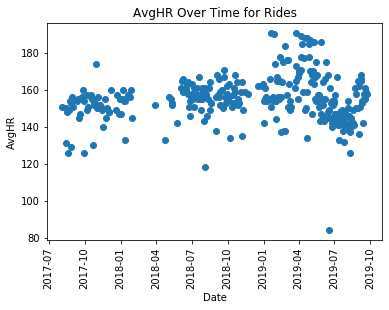

In [12]:
# Plot AvgHR over time for all virtual and outdoor bike rides
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot_date(df['Date'],df['AvgHR'])
plt.title('AvgHR Over Time for Rides')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('AvgHR')
plt.show()

In [13]:
# Calculate sample size of each class
count_no_sub = len(df[df['AvgHR_bin']==1])
count_sub = len(df[df['AvgHR_bin']==0])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of High AvgHR is", '%.2f' %(pct_of_no_sub*100))
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Low AvgHR is", '%.2f' %(pct_of_sub*100))

percentage of High AvgHR is 52.75
percentage of Low AvgHR is 47.25


Text(0, 0.5, 'Frequency of Average HR')

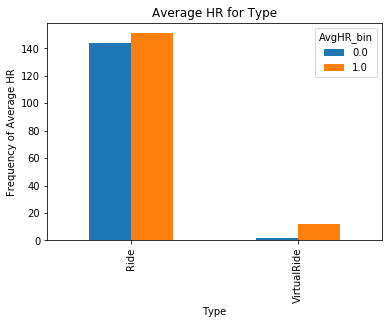

In [14]:
# Plot distribution of AvgHR for Rides and VirtualRides
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(df.Type,df.AvgHR_bin).plot(kind='bar')
plt.title('Average HR for Type')
plt.xlabel('Type')
plt.ylabel('Frequency of Average HR')
#plt.savefig('purchase_avghr_type')

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
# Define train and test set, perform RFE
window_size = 294
# removed Calories as feature since p-value was 0.07 > 0.05 (from below Logit function), as recommended
df_vars = ['Distance (km)', 'Avg Pace (/km)', 'HRSS', 'Elevation Gain (m)','AvgHR_bin']
df_final = df[df_vars]
df_final_vars=df_final.columns.values.tolist()
y=df_final.AvgHR_bin
X=[i for i in df_final_vars if i not in y]

X = df_final.loc[:, df_final.columns != 'AvgHR_bin']
y = df_final.loc[:, df_final.columns == 'AvgHR_bin']

# Configure train and test sets
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]

X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print(X_test, y_test)

# Perform RFE (recursive feature elimination) to determine ranking of features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

     Distance (km)  Avg Pace (/km)  HRSS  Elevation Gain (m)
0             62.5             113   144               589.0
1             80.1             125   217               890.0
2             35.2             116    87               314.0
3             45.6             114   119               447.0
4             41.1             120    96               454.0
..             ...             ...   ...                 ...
289           40.6             233    86               716.4
290          124.3             159   391              2602.0
291           53.4             151   187              1012.3
292           53.4             152   169              1006.7
293           40.3             170   115               794.6

[294 rows x 4 columns]      AvgHR_bin
0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
..         ...
289        0.0
290        0.0
291        1.0
292        1.0
293        0.0

[294 rows x 1 columns]
[ True  True  True  True]
[1 1 1 1]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
# Implement Logit model to determine p-values and coefficients for each feature
import statsmodels
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.307462
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.555     
Dependent Variable:  AvgHR_bin        AIC:              198.0117  
Date:                2019-12-04 22:21 BIC:              212.9451  
No. Observations:    309              Log-Likelihood:   -95.006   
Df Model:            3                LL-Null:          -213.71   
Df Residuals:        305              LLR p-value:      3.4432e-51
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Distance (km)      -0.1857   0.0271 -6.8416 0.0000 -0.2389 -0.1325
Avg Pace (/km)     -0.0120   0.0029 -4.1900 0.0000 -0

### Iterate Over All Window Sizes for LR

In [186]:
# Iterate over all window sizes to determine optimal size
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Change window_size_optimization flag to perform iterations
window_size_optimization = False

if window_size_optimization == True:

    logreg = LogisticRegression()
    accuracies = np.zeros(276)
    #298 accuracy indices

    # Iterate over all window sizes and compute accuracy for each LR model
    for window_size in range(1,277):
    #window_size = 299
        print('# Predictions: ', window_size)
        X_train = X.iloc[window_size:]
        y_train = y.iloc[window_size:]
        # print('train labels: ', y_train)
        X_test = X.iloc[:window_size]
        y_test = y.iloc[:window_size]
        # print('test labels: ', y_test)

        actuals = pd.DataFrame(y_test)
        actuals = actuals.rename(columns={'AvgHR_bin':'Actuals'})
        # print('actuals: \n', actuals)
        preds = np.zeros(X_test.shape[0])
        # print('X_test: \n', X_test)
        for i in range(0,y_test.shape[0]):
            # print('X train shape: ', X_train.shape[0])
            # print('X train: ', X_train.head())
            logreg.fit(X_train, y_train.values.ravel())
            # Predict test set
            # print('X test: ', X_test.iloc[0])
            y_pred = logreg.predict(np.array(X_test.iloc[-1]).reshape(1,-1))
            # print('actual: ',y_test.loc[0, 'AvgHR_bin'], '\n pred: ',y_pred, '\n')
            preds[i] = y_pred
            #print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
            #print("X test -1: ", X_test.iloc[-1])
            
            X_test_inst = pd.DataFrame(data= [X_test.iloc[-1]],columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
            y_test_inst = pd.DataFrame(data = [y_test.iloc[-1]],columns=["AvgHR_bin"])
            #print("X test inst: ", X_test_inst)
            X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
            X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
            #print("X train: \n", X_train)

            y_train = y_train.drop(y_train.index[-1])
            y_train = pd.concat([y_test_inst,y_train])
            y_train = y_train.reset_index(drop=True)
            #print("y train \n", y_train)

            X_test = X_test.drop(X_test.index[-1])
            X_test = X_test.reset_index(drop=True)
            #print("X test: \n", X_test)
            y_test = y_test.drop(y_test.index[-1])
            y_test = y_test.reset_index(drop=True)
            
        preds_act_df = pd.DataFrame(preds, columns=['Predictions'])
        preds_act_df = preds_act_df.join(actuals.iloc[::-1].reset_index(drop = True))
        # print('actuals and preds: \n', preds_act_df)
        
        accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
        print('accuracy for window size {}: {}'.format(309-window_size, accuracy))
        accuracies[window_size-1] = accuracy
    
    print('Accuracies: ', accuracies)
    
    # Output accuracies for each window size to Accuracies_for_Window_Size_Variations.csv file 
    with open('Accuracies_for_Window_Size_Variations.csv', 'w') as f:
        for i in range(0,len(accuracies)):
            f.write(str(308-i) + ': ' + str(accuracies[i]))
            f.write('\n')

# Predictions:  1
accuracy for window size 308: 1.0
# Predictions:  2
accuracy for window size 307: 1.0
# Predictions:  3
accuracy for window size 306: 1.0
# Predictions:  4
accuracy for window size 305: 1.0
# Predictions:  5
accuracy for window size 304: 0.8
# Predictions:  6
accuracy for window size 303: 0.6666666666666666
# Predictions:  7
accuracy for window size 302: 0.7142857142857143
# Predictions:  8
accuracy for window size 301: 0.75
# Predictions:  9
accuracy for window size 300: 0.7777777777777778
# Predictions:  10
accuracy for window size 299: 0.8
# Predictions:  11
accuracy for window size 298: 0.8181818181818182
# Predictions:  12
accuracy for window size 297: 0.8333333333333334
# Predictions:  13
accuracy for window size 296: 0.8461538461538461
# Predictions:  14
accuracy for window size 295: 0.7142857142857143
# Predictions:  15
accuracy for window size 294: 0.7333333333333333
# Predictions:  16
accuracy for window size 293: 0.75
# Predictions:  17
accuracy for window 

accuracy for window size 183: 0.9365079365079365
# Predictions:  127
accuracy for window size 182: 0.937007874015748
# Predictions:  128
accuracy for window size 181: 0.9375
# Predictions:  129
accuracy for window size 180: 0.9302325581395349
# Predictions:  130
accuracy for window size 179: 0.9307692307692308
# Predictions:  131
accuracy for window size 178: 0.9312977099236641
# Predictions:  132
accuracy for window size 177: 0.9318181818181818
# Predictions:  133
accuracy for window size 176: 0.9323308270676691
# Predictions:  134
accuracy for window size 175: 0.9328358208955224
# Predictions:  135
accuracy for window size 174: 0.9333333333333333
# Predictions:  136
accuracy for window size 173: 0.9264705882352942
# Predictions:  137
accuracy for window size 172: 0.927007299270073
# Predictions:  138
accuracy for window size 171: 0.927536231884058
# Predictions:  139
accuracy for window size 170: 0.9280575539568345
# Predictions:  140
accuracy for window size 169: 0.9285714285714286


accuracy for window size 62: 0.8502024291497976
# Predictions:  248
accuracy for window size 61: 0.8508064516129032
# Predictions:  249
accuracy for window size 60: 0.8514056224899599
# Predictions:  250
accuracy for window size 59: 0.844
# Predictions:  251
accuracy for window size 58: 0.8446215139442231
# Predictions:  252
accuracy for window size 57: 0.8373015873015873
# Predictions:  253
accuracy for window size 56: 0.841897233201581
# Predictions:  254
accuracy for window size 55: 0.8385826771653543
# Predictions:  255
accuracy for window size 54: 0.8431372549019608
# Predictions:  256
accuracy for window size 53: 0.83203125
# Predictions:  257
accuracy for window size 52: 0.8249027237354085
# Predictions:  258
accuracy for window size 51: 0.8333333333333334
# Predictions:  259
accuracy for window size 50: 0.833976833976834
# Predictions:  260
accuracy for window size 49: 0.8307692307692308
# Predictions:  261
accuracy for window size 48: 0.8275862068965517
# Predictions:  262
acc

In [187]:
# Read in accuracies for each window size from Accuracies_for_Window_Size_Variations.csv file and sort by accuracy to determine best window size
import csv
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
mylist = pd.DataFrame(columns=['Window', 'Accuracy'])
with open('Accuracies_for_Window_Size_Variations.csv', 'r') as csvfile:
    for i,row in enumerate(csv.reader(csvfile, delimiter='\n')):
        mylist.loc[i,'Window'] = row[0].split(':')[0]
        mylist.loc[i,'Accuracy'] = row[0].split(':')[1]
print(mylist.sort_values('Accuracy', 0,ascending=False))

    Window             Accuracy
0      308                  1.0
1      307                  1.0
2      306                  1.0
3      305                  1.0
111    197               0.9375
127    181               0.9375
126    182    0.937007874015748
110    198   0.9369369369369369
125    183   0.9365079365079365
109    199   0.9363636363636364
107    201   0.9351851851851852
106    202   0.9345794392523364
121    187   0.9344262295081968
120    188   0.9338842975206612
119    189   0.9333333333333333
134    174   0.9333333333333333
133    175   0.9328358208955224
118    190   0.9327731092436975
132    176   0.9323308270676691
117    191   0.9322033898305084
131    177   0.9318181818181818
116    192   0.9316239316239316
130    178   0.9312977099236641
115    193   0.9310344827586207
129    179   0.9307692307692308
114    194   0.9304347826086956
128    180   0.9302325581395349
113    195   0.9298245614035088
140    168   0.9290780141843972
139    169   0.9285714285714286
138    1

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Run LR with optimal window size of 181 (# predictions = 128)
window_size = 128
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
# train set
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]
# print('train labels: ', y_train)
# test set
X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
# print('test labels: ', y_test)

actuals = pd.DataFrame(y_test)
actuals = actuals.rename(columns={'AvgHR_bin':'Actuals'})
#print('actuals: \n', actuals)
#print('reverse actuals: ', actuals.iloc[::-1])
preds = np.zeros(X_test.shape[0])
# print('X_test: \n', X_test)
for i in range(0,y_test.shape[0]):
    print('Iteration: ', i)
    print('X train shape: ', X_train.shape[0])
    print('X test shape: ', y_test.shape[0])
    logreg.fit(X_train, y_train.values.ravel())
    # Predict test set
    y_pred = logreg.predict(np.array(X_test.iloc[-1]).reshape(1,-1))
    print('actual: ',y_test.iloc[-1], '\n pred: ',y_pred, '\n')
    preds[i] = y_pred
    # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
    #print('test instance: ', X_test.iloc[-1])
    # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
    # print('new X train: ', X_train.head())
    
    #print("X test -1: ", X_test.iloc[-1])
    X_test_inst = pd.DataFrame(data= [X_test.iloc[-1]],columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
    y_test_inst = pd.DataFrame(data = [y_test.iloc[-1]],columns=["AvgHR_bin"])
    #print("X test inst: ", X_test_inst)
    X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
    X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
    #print("X train: \n", X_train)

    y_train = y_train.drop(y_train.index[-1])
    y_train = pd.concat([y_test_inst,y_train])
    y_train = y_train.reset_index(drop=True)
    #print("y train \n", y_train)
    
    X_test = X_test.drop(X_test.index[-1])
    X_test = X_test.reset_index(drop=True)
    #print("X test: \n", X_test)

    y_test = y_test.drop(y_test.index[-1])
    y_test = y_test.reset_index(drop=True)

preds_act_df = pd.DataFrame(preds, columns=['Predictions'])
preds_act_df = preds_act_df.join(actuals.iloc[::-1].reset_index(drop = True))
print('actuals and preds: \n', preds_act_df)
accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
print('accuracy for window size {}: {}'.format(309-window_size, accuracy))


# Predictions:  128
Window Size:  181
Iteration:  0
X train shape:  181
X test shape:  128
actual:  AvgHR_bin    0.0
Name: 127, dtype: float64 
 pred:  [0.] 

Iteration:  1
X train shape:  181
X test shape:  127
actual:  AvgHR_bin    1.0
Name: 126, dtype: float64 
 pred:  [1.] 

Iteration:  2
X train shape:  181
X test shape:  126
actual:  AvgHR_bin    0.0
Name: 125, dtype: float64 
 pred:  [0.] 

Iteration:  3
X train shape:  181
X test shape:  125
actual:  AvgHR_bin    0.0
Name: 124, dtype: float64 
 pred:  [0.] 

Iteration:  4
X train shape:  181
X test shape:  124
actual:  AvgHR_bin    0.0
Name: 123, dtype: float64 
 pred:  [0.] 

Iteration:  5
X train shape:  181
X test shape:  123
actual:  AvgHR_bin    1.0
Name: 122, dtype: float64 
 pred:  [1.] 

Iteration:  6
X train shape:  181
X test shape:  122
actual:  AvgHR_bin    1.0
Name: 121, dtype: float64 
 pred:  [1.] 

Iteration:  7
X train shape:  181
X test shape:  121
actual:  AvgHR_bin    1.0
Name: 120, dtype: float64 
 pred:  [

actual:  AvgHR_bin    0.0
Name: 59, dtype: float64 
 pred:  [0.] 

Iteration:  69
X train shape:  181
X test shape:  59
actual:  AvgHR_bin    0.0
Name: 58, dtype: float64 
 pred:  [0.] 

Iteration:  70
X train shape:  181
X test shape:  58
actual:  AvgHR_bin    0.0
Name: 57, dtype: float64 
 pred:  [0.] 

Iteration:  71
X train shape:  181
X test shape:  57
actual:  AvgHR_bin    0.0
Name: 56, dtype: float64 
 pred:  [0.] 

Iteration:  72
X train shape:  181
X test shape:  56
actual:  AvgHR_bin    0.0
Name: 55, dtype: float64 
 pred:  [0.] 

Iteration:  73
X train shape:  181
X test shape:  55
actual:  AvgHR_bin    0.0
Name: 54, dtype: float64 
 pred:  [0.] 

Iteration:  74
X train shape:  181
X test shape:  54
actual:  AvgHR_bin    1.0
Name: 53, dtype: float64 
 pred:  [0.] 

Iteration:  75
X train shape:  181
X test shape:  53
actual:  AvgHR_bin    1.0
Name: 52, dtype: float64 
 pred:  [1.] 

Iteration:  76
X train shape:  181
X test shape:  52
actual:  AvgHR_bin    0.0
Name: 51, dtyp

In [191]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(actuals.iloc[::-1].reset_index(drop = True), preds)
print(confusion_matrix1)

[[65  4]
 [ 4 55]]


In [192]:
tn, fp, fn, tp = confusion_matrix(actuals.iloc[::-1].reset_index(drop = True), preds).ravel()
print('true neg: ', tn, '\nfalse pos: ', fp, '\nfalse neg: ', fn, '\ntrue pos: ',tp)

true neg:  65 
false pos:  4 
false neg:  4 
true pos:  55


In [193]:
# Precision, recall, f1-score, support (# of test instances per class)
from sklearn.metrics import classification_report
print(classification_report(actuals.iloc[::-1].reset_index(drop = True), preds))


              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        69
         1.0       0.93      0.93      0.93        59

    accuracy                           0.94       128
   macro avg       0.94      0.94      0.94       128
weighted avg       0.94      0.94      0.94       128



In [24]:
# ROC curve
'''
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actuals, logreg.predict(np.array(X_test.iloc[0].reshape(1,-1))
fpr, tpr, thresholds = roc_curve(y_test.iloc[0], logreg.predict_proba(np.array(X_test.iloc[0].reshape(1,-1))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
'''

'\nfrom sklearn.metrics import roc_auc_score\nfrom sklearn.metrics import roc_curve\nlogit_roc_auc = roc_auc_score(actuals, logreg.predict(np.array(X_test.iloc[0].reshape(1,-1))\nfpr, tpr, thresholds = roc_curve(y_test.iloc[0], logreg.predict_proba(np.array(X_test.iloc[0].reshape(1,-1))[:,1])\nplt.figure()\nplt.plot(fpr, tpr, label=\'Logistic Regression (area = %0.2f)\' % logit_roc_auc)\nplt.plot([0, 1], [0, 1],\'r--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic\')\nplt.legend(loc="lower right")\nplt.savefig(\'Log_ROC\')\nplt.show()\n'

## Iterate Over All Look-Ahead Values for Given Window Size for LR

In [233]:
import numpy as np
import math
import statistics as stats
# Run LR with optimal window size of 15 (# predictions = 294)

window_size = 128 # num of preds, window_size = 309-window_size param
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
average_accuracies = np.zeros(window_size)
predictions=[] #np.zeros(window_size)

for m in range(1,window_size+1):
    # train set
    X_train = X.iloc[window_size:]
    y_train = y.iloc[window_size:]
    #print('train labels: ', y_train)
    # test set
    X_test = X.iloc[:window_size]
    y_test = y.iloc[:window_size]
    #print('test labels: ', y_test)
    
    #look_ahead = 7
    look_ahead=m
    print("\n\nlook ahead: ", m)
    print("# iterations: ", math.ceil(y_test.shape[0]/look_ahead))
    
    actuals = pd.DataFrame(y_test)
    actuals = actuals.rename(columns={'AvgHR_bin':'Actuals'})
    accuracies = np.zeros(math.ceil(y_test.shape[0]/look_ahead))
    computations = np.zeros(math.ceil(y_test.shape[0]/look_ahead))

    # print('actuals: \n', actuals)
    # preds = np.zeros((math.ceil(y_test.shape[0]/look_ahead),look_ahead))
    # actuals_look_ahead = np.zeros((math.ceil(y_test.shape[0]/look_ahead),look_ahead))
    # print('X_test: \n', X_test)
    for i in range(0,math.ceil(y_test.shape[0]/look_ahead)):
        preds = np.zeros(min(look_ahead,y_test.shape[0]))
        actuals_look_ahead = np.zeros(min(look_ahead,y_test.shape[0]))
        computations[i] = min(look_ahead, y_test.shape[0])
        # print('Iteration: ', i)
#         print('X train shape: ', X_train.shape[0])
#         print('X test shape: ', y_test.shape[0])
        logreg.fit(X_train, y_train.values.ravel())
        # Predict test set
        for j in range(1,min(look_ahead+1,y_test.shape[0]+1)):
            y_pred = logreg.predict(np.array(X_test.iloc[-j]).reshape(1,-1))
#             print('actual: ',y_test.iloc[-j], '\n pred: ',y_pred, '\n')
            preds[j-1] = y_pred
            # predictions[(j*(i+1))-1] = y_pred
            actuals_look_ahead[j-1] = y_test.iloc[-j]
        # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
        #print('test instance: ', X_test.iloc[-1])
        # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
        # print('new X train: ', X_train.head())

        #print("X test -1: ", X_test.iloc[-1])
        X_test_inst = pd.DataFrame(columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
        y_test_inst = pd.DataFrame(columns=["AvgHR_bin"])
        for k in range(1,min(look_ahead+1,y_test.shape[0]+1)):
            X_test_inst = X_test_inst.append(X_test.iloc[-k])
            y_test_inst = y_test_inst.append(y_test.iloc[-k])        
        #print("X test inst: ", X_test_inst)

        X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
        X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
        #print("X train: \n", X_train)

        y_train = y_train.drop(y_train.index[-1])
        y_train = pd.concat([y_test_inst,y_train]).reset_index(drop=True)
        #print("y train \n", y_train)

        X_test = X_test.drop(X_test_inst.index.values)
        X_test = X_test.reset_index(drop=True)
        #print("X test: \n", X_test)

        y_test = y_test.drop(y_test_inst.index.values)
        y_test = y_test.reset_index(drop=True)
        
        preds_act_df = pd.DataFrame(preds)
        act_df = pd.DataFrame(actuals_look_ahead)
        # print("predictions: ", preds)
        # print("actuals: ", actuals_look_ahead)
        #preds_act_df = preds_act_df.join(act_df)
        #print('actuals and preds: \n', preds_act_df)
        accuracy = metrics.accuracy_score(preds,actuals_look_ahead)
        accuracies[i] = accuracy
        # print('accuracy for window size {}: {}'.format(window_size, accuracy))
        # predictions.append(preds)
    print('accuracies: ', accuracies)
    print('computations: ', computations)
    h=len(accuracies)
    avg_accuracy = 0
    for g in range(len(accuracies)):
        avg_accuracy += (computations[g]/window_size)*accuracies[g] 
    # avg_accuracy = stats.mean(accuracies)
    print('avg accuracy: ', avg_accuracy)
    average_accuracies[m-1] = avg_accuracy
    #print('total predictions: ', predictions)
    #print('total actuals: ', actuals.iloc[::-1].reset_index(drop = True))
    #tot_acc = metrics.accuracy_score(predictions,actuals.iloc[::-1].reset_index(drop = True))
    #print('tot accuracy: ', tot_acc)

avg_acc_df = pd.DataFrame(data=average_accuracies, columns=['Avg Accuracy'])
print('Averages: ', avg_acc_df) 


# Predictions:  128
Window Size:  181


look ahead:  1
# iterations:  128
accuracies:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1.]
computations:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
avg accuracy:  0.9375


look ahead:  2
# iterations:  64
accuracies:  [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

accuracies:  [1.      0.90625 0.9375  0.84375]
computations:  [32. 32. 32. 32.]
avg accuracy:  0.921875


look ahead:  33
# iterations:  4
accuracies:  [1.         0.90909091 0.90909091 0.86206897]
computations:  [33. 33. 33. 29.]
avg accuracy:  0.921875


look ahead:  34
# iterations:  4
accuracies:  [1.         0.91176471 0.91176471 0.84615385]
computations:  [34. 34. 34. 26.]
avg accuracy:  0.921875


look ahead:  35
# iterations:  4
accuracies:  [1.         0.91428571 0.91428571 0.82608696]
computations:  [35. 35. 35. 23.]
avg accuracy:  0.921875


look ahead:  36
# iterations:  4
accuracies:  [1.         0.91666667 0.91666667 0.8       ]
computations:  [36. 36. 36. 20.]
avg accuracy:  0.921875


look ahead:  37
# iterations:  4
accuracies:  [0.97297297 0.94594595 0.89189189 0.76470588]
computations:  [37. 37. 37. 17.]
avg accuracy:  0.9140625


look ahead:  38
# iterations:  4
accuracies:  [0.97368421 0.92105263 0.92105263 0.71428571]
computations:  [38. 38. 38. 14.]
avg accuracy:

accuracies:  [0.95789474 0.81818182]
computations:  [95. 33.]
avg accuracy:  0.921875


look ahead:  96
# iterations:  2
accuracies:  [0.94791667 0.84375   ]
computations:  [96. 32.]
avg accuracy:  0.921875


look ahead:  97
# iterations:  2
accuracies:  [0.94845361 0.83870968]
computations:  [97. 31.]
avg accuracy:  0.921875


look ahead:  98
# iterations:  2
accuracies:  [0.93877551 0.86666667]
computations:  [98. 30.]
avg accuracy:  0.921875


look ahead:  99
# iterations:  2
accuracies:  [0.93939394 0.86206897]
computations:  [99. 29.]
avg accuracy:  0.921875


look ahead:  100
# iterations:  2
accuracies:  [0.94       0.85714286]
computations:  [100.  28.]
avg accuracy:  0.921875


look ahead:  101
# iterations:  2
accuracies:  [0.94059406 0.85185185]
computations:  [101.  27.]
avg accuracy:  0.921875


look ahead:  102
# iterations:  2
accuracies:  [0.94117647 0.84615385]
computations:  [102.  26.]
avg accuracy:  0.921875


look ahead:  103
# iterations:  2
accuracies:  [0.941747

In [234]:
# Output accuracies for each window size to Accuracies_for_Look_Ahead_Variations.csv file 
with open('Accuracies_for_Look_Ahead_Variations.csv', 'w') as f:
    # f.write("Look Ahead : Accuracy \n")
    for i in range(0,len(average_accuracies)):
        f.write(str(i+1) + ': ' + str(average_accuracies[i]))
        f.write('\n')

In [235]:
# Read in accuracies for each look ahead value from Accuracies_for_Look_Ahead_Variations.csv file and sort by accuracy to determine best look ahead value
import csv
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
mylist = pd.DataFrame(columns=[])
with open('Accuracies_for_Look_Ahead_Variations.csv', 'r') as csvfile:
    for i,row in enumerate(csv.reader(csvfile, delimiter='\n')):
        mylist.loc[i,'Look Ahead'] = row[0].split(':')[0]
        mylist.loc[i,'Accuracy'] = row[0].split(':')[1]
print(mylist.sort_values('Accuracy', 0,ascending=False))

      Look Ahead    Accuracy
0    Look Ahead    Accuracy 
1              1      0.9375
2              2   0.9296875
3              3   0.9296875
4              4   0.9296875
100          100    0.921875
101          101    0.921875
102          102    0.921875
103          103    0.921875
104          104    0.921875
105          105    0.921875
106          106    0.921875
107          107    0.921875
108          108    0.921875
59            59    0.921875
112          112    0.921875
75            75    0.921875
58            58    0.921875
113          113    0.921875
56            56    0.921875
54            54    0.921875
53            53    0.921875
52            52    0.921875
51            51    0.921875
99            99    0.921875
77            77    0.921875
76            76    0.921875
98            98    0.921875
96            96    0.921875
95            95    0.921875
94            94    0.921875
93            93    0.921875
92            92    0.921875
91            

Almost all accuracies are above 0.8. The highest accuracy is 0.957 and looks ahead 127 days, a value equal to almost the entire test set size. Thus, rather than iterate through each test instance and leave one out, it is best to predict the entire test set at once, rather than leaving a group out at a time.

### LR Implementation with Optimal Window Size = 181 and Optimal Look Ahead = 118

In [241]:
import numpy as np
import math
import statistics as stats
# Run LR with optimal window size of 15 (# predictions = 294)

window_size = 128 # num of preds, window_size = 309-window_size param
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
# train set
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]
print('train labels: ', y_train)
# test set
X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print('test labels: ', y_test)

look_ahead = 118

actuals = pd.DataFrame(y_test)
accuracies = np.zeros(math.ceil(y_test.shape[0]/look_ahead))
computations = np.zeros(math.ceil(y_test.shape[0]/look_ahead))
predictions = []
# print('X_test: \n', X_test)

for i in range(0,math.ceil(y_test.shape[0]/look_ahead)):
    preds = np.zeros(min(look_ahead,y_test.shape[0]))
    actuals_look_ahead = np.zeros(min(look_ahead,y_test.shape[0]))
    computations[i] = min(look_ahead,y_test.shape[0])
    print('Iteration: ', i)
    print('X train shape: ', X_train.shape[0])
    print('X test shape: ', y_test.shape[0])
    logreg.fit(X_train, y_train.values.ravel())
    # Predict test set
    for j in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        y_pred = logreg.predict(np.array(X_test.iloc[-j]).reshape(1,-1))
        print('actual: ',y_test.iloc[-j], '\n pred: ',y_pred, '\n')
        preds[j-1] = y_pred
        predictions.append(y_pred)
        actuals_look_ahead[j-1] = y_test.iloc[-j]
    # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
    #print('test instance: ', X_test.iloc[-1])
    # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
    # print('new X train: ', X_train.head())
    
    #print("X test -1: ", X_test.iloc[-1])
    X_test_inst = pd.DataFrame(columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
    y_test_inst = pd.DataFrame(columns=["AvgHR_bin"])
    for k in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        X_test_inst = X_test_inst.append(X_test.iloc[-k])
        y_test_inst = y_test_inst.append(y_test.iloc[-k])        
    print("X test inst: ", X_test_inst)

    X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
    X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
    #print("X train: \n", X_train)

    y_train = y_train.drop(y_train.index[-1])
    y_train = pd.concat([y_test_inst,y_train]).reset_index(drop=True)
    #print("y train \n", y_train)
    
    X_test = X_test.drop(X_test_inst.index.values)
    X_test = X_test.reset_index(drop=True)
    #print("X test: \n", X_test)

    y_test = y_test.drop(y_test_inst.index.values)
    y_test = y_test.reset_index(drop=True)
    
    preds_act_df = pd.DataFrame(preds)
    act_df = pd.DataFrame(actuals_look_ahead)
    print("predictions: ", preds)
    print("actuals: ", actuals_look_ahead)
    #preds_act_df = preds_act_df.join(act_df)
    #print('actuals and preds: \n', preds_act_df)
    accuracy = metrics.accuracy_score(preds,actuals_look_ahead)
    accuracies[i] = accuracy
    print('accuracy for iteration {} with look ahead value {}: {}'.format(i+1, look_ahead, accuracy))
#print('accuracies: ', accuracies)
h=len(accuracies)
avg_accuracy = 0
for g in range(len(accuracies)):
    avg_accuracy += (computations[g]/window_size)*accuracies[g] 
print('avg accuracy: ', avg_accuracy)
# preds_act_df = pd.DataFrame(preds)
# preds_act_df = preds_act_df.join(actuals)
# print('actuals and preds: \n', preds_act_df)
# accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
# print('accuracy for window size {}: {}'.format(window_size, accuracy))

# Predictions:  128
Window Size:  181
train labels:       AvgHR_bin
128        1.0
129        1.0
130        1.0
131        0.0
132        1.0
133        0.0
134        1.0
135        1.0
136        0.0
137        1.0
138        1.0
139        1.0
140        1.0
141        1.0
142        0.0
143        1.0
144        1.0
145        0.0
146        1.0
147        1.0
148        1.0
149        1.0
150        1.0
151        0.0
152        0.0
153        1.0
154        0.0
155        1.0
156        1.0
157        1.0
158        0.0
159        0.0
160        1.0
161        1.0
162        1.0
163        0.0
164        1.0
165        1.0
166        0.0
167        1.0
168        1.0
169        0.0
170        0.0
171        1.0
172        1.0
173        1.0
174        1.0
175        1.0
176        1.0
177        0.0
178        0.0
179        0.0
180        1.0
181        1.0
182        0.0
183        1.0
184        1.0
185        0.0
186        1.0
187        1.0
188        1.0
189        0.0
19

actual:  AvgHR_bin    0.0
Name: 40, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 39, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 38, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 37, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 36, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 35, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 34, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 33, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 32, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    0.0
Name: 31, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 30, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    0.0
Name: 29, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 28, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 27, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 26, dtype: float64 
 pred:  [0

In [249]:
# Output predictions and actuals for final window size to LR.csv file 
with open('LR.csv', 'w') as f:
    f.write("Prediction, Actual \n")
    for i in range(0,window_size):
        f.write(str(predictions[i][0]) + ', ' + str(actuals.iloc[::-1].reset_index(drop = True).iloc[i][0]))
        f.write('\n')

## Random Forest
#### https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

### Iterate Over All Window Sizes for RF

In [210]:
# Iterate over all window sizes to determine optimal size for RF
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import math
import statistics as stats
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create the model with 100 trees
RF = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')



# Change window_size_optimization flag to perform iterations
window_size_optimization = False

if window_size_optimization == True:
    accuracies = np.zeros(276)
    roc_values = np.zeros(276)
    #298 accuracy indices

    # Iterate over all window sizes and compute accuracy for each LR model
    for window_size in range(1,277):
    #window_size = 299
        print('# Predictions: ', window_size)
        X_train = X.iloc[window_size:]
        y_train = y.iloc[window_size:]
        # print('train labels: ', y_train)
        X_test = X.iloc[:window_size]
        y_test = y.iloc[:window_size]
        # print('test labels: ', y_test)

        actuals = pd.DataFrame(y_test)
        actuals = actuals.rename(columns={'AvgHR_bin':'Actuals'})
        # print('actuals: \n', actuals)
        preds = np.zeros(X_test.shape[0])
        rf_probs = np.zeros(X_test.shape[0])
        # print('X_test: \n', X_test)
        for i in range(0,y_test.shape[0]):
            # print('X train shape: ', X_train.shape[0])
            # print('X train: ', X_train.head())
            RF.fit(X_train, y_train.values.ravel())
            # Predict test set
            # print('X test: ', X_test.iloc[0])
            y_pred = RF.predict(np.array(X_test.iloc[-1]).reshape(1,-1))
            # print('actual: ',y_test.loc[0, 'AvgHR_bin'], '\n pred: ',y_pred, '\n')
            preds[i] = y_pred
#             rf_probs[i] = RF.predict_proba(np.array(X_test.iloc[-i]).reshape(1,-1))[:, 1]
            #print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
            #print("X test -1: ", X_test.iloc[-1])
            
            X_test_inst = pd.DataFrame(data= [X_test.iloc[-1]],columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
            y_test_inst = pd.DataFrame(data = [y_test.iloc[-1]],columns=["AvgHR_bin"])
            #print("X test inst: ", X_test_inst)
            X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
            X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
            #print("X train: \n", X_train)

            y_train = y_train.drop(y_train.index[-1])
            y_train = pd.concat([y_test_inst,y_train])
            y_train = y_train.reset_index(drop=True)
            #print("y train \n", y_train)

            X_test = X_test.drop(X_test.index[-1])
            X_test = X_test.reset_index(drop=True)
            #print("X test: \n", X_test)
            y_test = y_test.drop(y_test.index[-1])
            y_test = y_test.reset_index(drop=True)
            
        preds_act_df = pd.DataFrame(preds, columns=['Predictions'])
        preds_act_df = preds_act_df = preds_act_df.join(actuals.iloc[::-1].reset_index(drop = True))
        # print('actuals and preds: \n', preds_act_df)
        accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
        print('accuracy for window size {}: {}'.format(309-window_size, accuracy))
        accuracies[window_size-1] = accuracy
    print('Accuracies: ', accuracies)


# Predictions:  1
accuracy for window size 308: 1.0
# Predictions:  2
accuracy for window size 307: 1.0
# Predictions:  3
accuracy for window size 306: 0.6666666666666666
# Predictions:  4
accuracy for window size 305: 0.75
# Predictions:  5
accuracy for window size 304: 0.6
# Predictions:  6
accuracy for window size 303: 0.8333333333333334
# Predictions:  7
accuracy for window size 302: 0.8571428571428571
# Predictions:  8
accuracy for window size 301: 0.875
# Predictions:  9
accuracy for window size 300: 0.7777777777777778
# Predictions:  10
accuracy for window size 299: 0.9
# Predictions:  11
accuracy for window size 298: 0.9090909090909091
# Predictions:  12
accuracy for window size 297: 0.9166666666666666
# Predictions:  13
accuracy for window size 296: 0.9230769230769231
# Predictions:  14
accuracy for window size 295: 0.8571428571428571
# Predictions:  15
accuracy for window size 294: 0.9333333333333333
# Predictions:  16
accuracy for window size 293: 0.8125
# Predictions:  17
a

accuracy for window size 184: 0.84
# Predictions:  126
accuracy for window size 183: 0.8174603174603174
# Predictions:  127
accuracy for window size 182: 0.8188976377952756
# Predictions:  128
accuracy for window size 181: 0.8203125
# Predictions:  129
accuracy for window size 180: 0.8217054263565892
# Predictions:  130
accuracy for window size 179: 0.8307692307692308
# Predictions:  131
accuracy for window size 178: 0.8244274809160306
# Predictions:  132
accuracy for window size 177: 0.8409090909090909
# Predictions:  133
accuracy for window size 176: 0.8195488721804511
# Predictions:  134
accuracy for window size 175: 0.8432835820895522
# Predictions:  135
accuracy for window size 174: 0.8444444444444444
# Predictions:  136
accuracy for window size 173: 0.8308823529411765
# Predictions:  137
accuracy for window size 172: 0.8175182481751825
# Predictions:  138
accuracy for window size 171: 0.8260869565217391
# Predictions:  139
accuracy for window size 170: 0.8201438848920863
# Predic

accuracy for window size 63: 0.7642276422764228
# Predictions:  247
accuracy for window size 62: 0.7611336032388664
# Predictions:  248
accuracy for window size 61: 0.7620967741935484
# Predictions:  249
accuracy for window size 60: 0.7590361445783133
# Predictions:  250
accuracy for window size 59: 0.776
# Predictions:  251
accuracy for window size 58: 0.7649402390438247
# Predictions:  252
accuracy for window size 57: 0.7658730158730159
# Predictions:  253
accuracy for window size 56: 0.7509881422924901
# Predictions:  254
accuracy for window size 55: 0.7716535433070866
# Predictions:  255
accuracy for window size 54: 0.7686274509803922
# Predictions:  256
accuracy for window size 53: 0.76171875
# Predictions:  257
accuracy for window size 52: 0.7782101167315175
# Predictions:  258
accuracy for window size 51: 0.7713178294573644
# Predictions:  259
accuracy for window size 50: 0.7683397683397684
# Predictions:  260
accuracy for window size 49: 0.7615384615384615
# Predictions:  261
a

In [211]:
with open('RF_Accuracies_for_Window_Size_Variations_2.csv', 'w') as f:
        for i in range(0,len(accuracies)):
            f.write(str(308-i) + ': ' + str(accuracies[i]))
            f.write('\n')

In [212]:
# Read in accuracies for each window size from Accuracies_for_Window_Size_Variations.csv file and sort by accuracy to determine best window size
import csv
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
mylist = pd.DataFrame(columns=['Window', 'Accuracy'])
with open('RF_Accuracies_for_Window_Size_Variations_2.csv', 'r') as csvfile:
    for i,row in enumerate(csv.reader(csvfile, delimiter='\n')):
        mylist.loc[i,'Window'] = row[0].split(':')[0]
        mylist.loc[i,'Accuracy'] = row[0].split(':')[1]
print(mylist.sort_values('Accuracy', 0,ascending=False))

    Window             Accuracy
0      308                  1.0
1      307                  1.0
17     291   0.9444444444444444
30     278   0.9354838709677419
14     294   0.9333333333333333
29     279   0.9333333333333333
28     280   0.9310344827586207
27     281   0.9285714285714286
26     282   0.9259259259259259
12     296   0.9230769230769231
25     283   0.9230769230769231
35     273   0.9166666666666666
11     297   0.9166666666666666
23     285   0.9166666666666666
34     274   0.9142857142857143
22     286   0.9130434782608695
33     275   0.9117647058823529
21     287   0.9090909090909091
10     298   0.9090909090909091
86     222   0.9080459770114943
72     236   0.9041095890410958
40     268   0.9024390243902439
19     289                  0.9
49     259                  0.9
9      299                  0.9
78     230   0.8987341772151899
87     221   0.8977272727272727
38     270   0.8974358974358975
77     231   0.8974358974358975
67     241   0.8970588235294118
66     2

### Iterate Over All Look Ahead Values from 1 to window size

In [237]:
import numpy as np
import math
import statistics as stats
# Run RF with optimal window size of and iterate over all look ahead values

window_size = 18 # num of preds, window_size = 309-window_size param = 291 (before, 91 = window size)
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
average_accuracies = np.zeros(window_size)

for m in range(1,window_size+1):
    # train set
    X_train = X.iloc[window_size:]
    y_train = y.iloc[window_size:]
    #print('train labels: ', y_train)
    # test set
    X_test = X.iloc[:window_size]
    y_test = y.iloc[:window_size]
    #print('test labels: ', y_test)
    
    #look_ahead = 7
    look_ahead=m
    print("\n\nlook ahead: ", m)
    print("# iterations: ", math.ceil(y_test.shape[0]/look_ahead))
    
    #actuals = pd.DataFrame(y_test)
    #actuals = actuals.rename(columns={'AvgHR_bin':'Actuals'})
    accuracies = np.zeros(math.ceil(y_test.shape[0]/look_ahead))
    computations = np.zeros(math.ceil(y_test.shape[0]/look_ahead))
    # print('actuals: \n', actuals)
    # preds = np.zeros((math.ceil(y_test.shape[0]/look_ahead),look_ahead))
    # actuals_look_ahead = np.zeros((math.ceil(y_test.shape[0]/look_ahead),look_ahead))
    # print('X_test: \n', X_test)
    for i in range(0,math.ceil(y_test.shape[0]/look_ahead)):
        preds = np.zeros(min(look_ahead,y_test.shape[0]))
        computations[i] = min(look_ahead, y_test.shape[0])
        actuals_look_ahead = np.zeros(min(look_ahead,y_test.shape[0]))
#         print('Iteration: ', i)
#         print('X train shape: ', X_train.shape[0])
#         print('X test shape: ', y_test.shape[0])
        RF.fit(X_train, y_train.values.ravel())
        # Predict test set
        for j in range(1,min(look_ahead+1,y_test.shape[0]+1)):
            y_pred = RF.predict(np.array(X_test.iloc[-j]).reshape(1,-1))
#             print('actual: ',y_test.iloc[-j], '\n pred: ',y_pred, '\n')
            preds[j-1] = y_pred
            actuals_look_ahead[j-1] = y_test.iloc[-j]
        # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
        #print('test instance: ', X_test.iloc[-1])
        # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
        # print('new X train: ', X_train.head())

        #print("X test -1: ", X_test.iloc[-1])
        X_test_inst = pd.DataFrame(columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
        y_test_inst = pd.DataFrame(columns=["AvgHR_bin"])
        for k in range(1,min(look_ahead+1,y_test.shape[0]+1)):
            X_test_inst = X_test_inst.append(X_test.iloc[-k])
            y_test_inst = y_test_inst.append(y_test.iloc[-k])        
        #print("X test inst: ", X_test_inst)

        X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
        X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
        #print("X train: \n", X_train)

        y_train = y_train.drop(y_train.index[-1])
        y_train = pd.concat([y_test_inst,y_train]).reset_index(drop=True)
        #print("y train \n", y_train)

        X_test = X_test.drop(X_test_inst.index.values)
        X_test = X_test.reset_index(drop=True)
        #print("X test: \n", X_test)

        y_test = y_test.drop(y_test_inst.index.values)
        y_test = y_test.reset_index(drop=True)

        preds_act_df = pd.DataFrame(preds)
        act_df = pd.DataFrame(actuals_look_ahead)
#         print("predictions: ", preds)
#         print("actuals: ", actuals_look_ahead)
        #preds_act_df = preds_act_df.join(act_df)
        #print('actuals and preds: \n', preds_act_df)
        accuracy = metrics.accuracy_score(preds,actuals_look_ahead)
    
        accuracies[i] = accuracy
        # print('accuracy for window size {}: {}'.format(window_size, accuracy))
    
    print('accuracies: ', accuracies)
    print('computations: ', computations)
    h=len(accuracies)
    avg_accuracy = 0
    for g in range(len(accuracies)):
        avg_accuracy += (computations[g]/window_size)*accuracies[g] 
    # avg_accuracy = stats.mean(accuracies)
    print('avg accuracy: ', avg_accuracy)
    average_accuracies[m-1] = avg_accuracy

avg_acc_df = pd.DataFrame(data=average_accuracies, columns=['Avg Accuracy'])
print('Averages: ', avg_acc_df) 


# Predictions:  18
Window Size:  291


look ahead:  1
# iterations:  18
accuracies:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]
computations:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg accuracy:  0.8888888888888892


look ahead:  2
# iterations:  9
accuracies:  [1.  1.  1.  1.  1.  1.  0.5 0.5 1. ]
computations:  [2. 2. 2. 2. 2. 2. 2. 2. 2.]
avg accuracy:  0.8888888888888891


look ahead:  3
# iterations:  6
accuracies:  [1.         1.         1.         0.66666667 0.66666667 1.        ]
computations:  [3. 3. 3. 3. 3. 3.]
avg accuracy:  0.888888888888889


look ahead:  4
# iterations:  5
accuracies:  [0.5  1.   1.   0.75 1.  ]
computations:  [4. 4. 4. 4. 2.]
avg accuracy:  0.8333333333333333


look ahead:  5
# iterations:  4
accuracies:  [1.  1.  0.8 1. ]
computations:  [5. 5. 5. 3.]
avg accuracy:  0.9444444444444444


look ahead:  6
# iterations:  3
accuracies:  [1.         1.         0.83333333]
computations:  [6. 6. 6.]
avg accuracy:  0.944444444444444

In [222]:
# Output accuracies for each look ahead value to RF_Accuracies_for_Look_Ahead_Variations.csv file 
with open('RF_Accuracies_for_Look_Ahead_Variations_2.csv', 'w') as f:
    #f.write("Look Ahead : Accuracy \n")
    for i in range(0,len(average_accuracies)):
        f.write(str(i+1) + ': ' + str(average_accuracies[i]))
        f.write('\n')
# Read in accuracies for each window size from Accuracies_for_Window_Size_Variations.csv file and sort by accuracy to determine best window size
import csv
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
mylist = pd.DataFrame(columns=['Look Ahead', 'Accuracy'])
with open('RF_Accuracies_for_Look_Ahead_Variations_2.csv', 'r') as csvfile:
    for i,row in enumerate(csv.reader(csvfile, delimiter='\n')):
        mylist.loc[i,'Look Ahead'] = row[0].split(':')[0]
        mylist.loc[i,'Accuracy'] = row[0].split(':')[1]
print(mylist.sort_values('Accuracy', 0,ascending=False))

   Look Ahead             Accuracy
0           1   0.9444444444444448
1           2   0.9444444444444446
8           9   0.9444444444444444
16         17   0.9444444444444444
15         16   0.9444444444444444
13         14   0.9444444444444444
12         13   0.9444444444444444
11         12   0.9444444444444444
9          10   0.9444444444444444
7           8   0.9444444444444444
6           7   0.9444444444444444
5           6   0.9444444444444444
4           5   0.9444444444444444
3           4   0.9444444444444444
17         18   0.9444444444444444
2           3   0.9444444444444443
10         11   0.8888888888888888
14         15   0.8333333333333334


## Random Forest Implementation (window size = 291, look ahead = 18)

In [252]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import math
import statistics as stats
from sklearn.metrics import roc_auc_score

# Create the model with 100 trees
RF = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
window_size = 18 # num of preds, window_size = 309-window_size param = 281
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
# train set
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]
print('train labels: ', y_train)
# test set
X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print('test labels: ', y_test)

look_ahead = 18
predictions = []
actuals = pd.DataFrame(y_test)
accuracies = np.zeros(math.ceil(y_test.shape[0]/look_ahead))
# print('X_test: \n', X_test)
roc_values = np.zeros(math.ceil(y_test.shape[0]/look_ahead))

for i in range(0,math.ceil(y_test.shape[0]/look_ahead)):
    preds = np.zeros(min(look_ahead,y_test.shape[0]))
    rf_probs = np.zeros(min(look_ahead,y_test.shape[0]))
    actuals_look_ahead = np.zeros(min(look_ahead,y_test.shape[0]))
    print('Iteration: ', i)
    print('X train shape: ', X_train.shape[0])
    print('X test shape: ', y_test.shape[0])
    RF.fit(X_train, y_train.values.ravel())
    # Predict test set
    for j in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        y_pred = RF.predict(np.array(X_test.iloc[-j]).reshape(1,-1))
        print('actual: ',y_test.iloc[-j], '\n pred: ',y_pred, '\n')
        preds[j-1] = y_pred
        predictions.append(y_pred)
        actuals_look_ahead[j-1] = y_test.iloc[-j]
        rf_probs[j-1] = RF.predict_proba(np.array(X_test.iloc[-j]).reshape(1,-1))[:, 1]
    # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
    #print('test instance: ', X_test.iloc[-1])
    # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
    # print('new X train: ', X_train.head())
    
    #print("X test -1: ", X_test.iloc[-1])
    X_test_inst = pd.DataFrame(columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
    y_test_inst = pd.DataFrame(columns=["AvgHR_bin"])
    for k in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        X_test_inst = X_test_inst.append(X_test.iloc[-k])
        y_test_inst = y_test_inst.append(y_test.iloc[-k])        
    print("X test inst: ", X_test_inst)

    X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
    X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
    #print("X train: \n", X_train)

    y_train = y_train.drop(y_train.index[-1])
    y_train = pd.concat([y_test_inst,y_train]).reset_index(drop=True)
    #print("y train \n", y_train)
    
    X_test = X_test.drop(X_test_inst.index.values)
    X_test = X_test.reset_index(drop=True)
    #print("X test: \n", X_test)

    y_test = y_test.drop(y_test_inst.index.values)
    y_test = y_test.reset_index(drop=True)
    
    preds_act_df = pd.DataFrame(preds)
    act_df = pd.DataFrame(actuals_look_ahead)
    print("predictions: ", preds)
    print("actuals: ", actuals_look_ahead)
    #preds_act_df = preds_act_df.join(act_df)
    #print('actuals and preds: \n', preds_act_df)
    accuracy = metrics.accuracy_score(preds,actuals_look_ahead)
    accuracies[i] = accuracy
    print('accuracy for window size {} with look ahead value {}: {}'.format(309-window_size, look_ahead, accuracy))
    roc_value = roc_auc_score(actuals_look_ahead, rf_probs)
    print('roc for window size {} with look ahead value {}: {}'.format(309-window_size, look_ahead, roc_value))
    roc_values[i] = roc_value
    
print('accuracies: ', accuracies)
print('avg accuracy: ', stats.mean(accuracies))
print('roc values: ', roc_values)

# Predictions:  18
Window Size:  291
train labels:       AvgHR_bin
18         0.0
19         1.0
20         1.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
30         0.0
31         0.0
32         0.0
33         0.0
34         0.0
35         0.0
36         0.0
37         0.0
38         0.0
39         0.0
40         0.0
41         0.0
42         0.0
43         0.0
44         0.0
45         0.0
46         0.0
47         0.0
48         0.0
49         0.0
50         0.0
51         0.0
52         1.0
53         1.0
54         0.0
55         0.0
56         0.0
57         0.0
58         0.0
59         0.0
60         0.0
61         0.0
62         0.0
63         0.0
64         0.0
65         1.0
66         0.0
67         0.0
68         1.0
69         0.0
70         0.0
71         1.0
72         1.0
73         1.0
74         0.0
75         0.0
76         1.0
77         0.0
78         1.0
79         0.0
80 

In [251]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(actuals_look_ahead, preds)
print(confusion_matrix1)

[[ 5  1]
 [ 1 11]]


In [225]:
# Precision, recall, f1-score, support (# of test instances per class)
from sklearn.metrics import classification_report
print(classification_report(actuals_look_ahead, preds))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       1.00      0.92      0.96        12

    accuracy                           0.94        18
   macro avg       0.93      0.96      0.94        18
weighted avg       0.95      0.94      0.95        18



Random Forest performs slightly better than LR when looking ahead 1 value for their respective window sizes of 291 and 181 and using the 'simple moving average' method of dropping the oldest record and adding the newest test record for the next prediction (0.944 accuracy vs. 0.938 for LR). When using looking ahead, RF scores 0.944 accuracy for look ahead of 18 (vs. 0.922 for LR for look ahead of 118). 

In [253]:
# Output predictions and actuals for final window size to LR.csv file 
with open('RF.csv', 'w') as f:
    f.write("Prediction, Actual \n")
    for i in range(0,window_size):
        f.write(str(predictions[i][0]) + ', ' + str(actuals.iloc[::-1].reset_index(drop = True).iloc[i][0]))
        f.write('\n')

In [22]:
X.describe()

,Distance (km),Avg Pace (/km),HRSS,Elevation Gain (m)
count,309.000000,309.000000,309.000000,309.000000
mean,52.237540,150.624595,152.022654,888.765372
std,27.117491,42.469105,82.021593,650.796847
min,1.400000,86.000000,3.000000,0.000000
25%,32.900000,119.000000,98.000000,492.000000
50%,50.100000,151.000000,128.000000,715.000000
75%,60.400000,168.000000,187.000000,1128.900000
max,170.600000,477.000000,471.000000,3617.000000


In [25]:

# Only include Ride and VirtualRide types
types_ride = ['Ride']
types_virtual = ['VirtualRide']
df_virtual = df[df.Type.isin(types_virtual)]
df_ride = df[df.Type.isin(types_ride)]

In [26]:
df_virtual

,AvgHR,Date,Type,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m),Time,AvgHR_bin
14,162,2019-09-03,VirtualRide,30.3,127,729,92,550.0,17:27:57,1.0
93,186,2019-05-11,VirtualRide,8.1,134,475,43,230.6,16:30:28,1.0
115,169,2019-04-02,VirtualRide,34.7,123,1016,127,558.0,18:15:16,1.0
139,178,2019-02-11,VirtualRide,28.1,99,706,93,350.0,18:35:21,1.0
141,156,2019-02-08,VirtualRide,34.3,108,676,72,287.0,18:21:19,1.0
142,144,2019-02-01,VirtualRide,25.1,146,518,52,500.0,17:38:16,0.0
146,190,2019-01-28,VirtualRide,29.9,98,639,113,322.0,18:31:23,1.0
148,166,2019-01-18,VirtualRide,34.9,103,660,91,294.0,18:33:46,1.0
149,191,2019-01-21,VirtualRide,27.7,104,628,122,324.0,18:30:07,1.0
150,156,2019-01-25,VirtualRide,41.1,111,776,94,391.0,18:39:47,1.0


In [27]:
df_ride

,AvgHR,Date,Type,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m),Time,AvgHR_bin
0,158,2019-09-22,Ride,62.5,113,1772,144,589.0,16:27:01,1.0
1,158,2019-09-21,Ride,80.1,125,2432,217,890.0,11:57:23,1.0
2,159,2019-09-20,Ride,35.2,116,1029,87,314.0,17:55:47,1.0
3,161,2019-09-18,Ride,45.6,114,1326,119,447.0,17:41:48,1.0
4,155,2019-09-17,Ride,41.1,120,1156,96,454.0,16:47:31,1.0
...,...,...,...,...,...,...,...,...,...,...
304,149,2017-08-18,Ride,70.9,146,1817,175,1202.7,10:09:39,0.0
305,148,2017-08-16,Ride,70.1,159,1827,191,1185.3,11:44:59,0.0
306,150,2017-08-14,Ride,53.7,163,1432,161,1015.8,13:41:10,0.0
307,131,2017-08-13,Ride,40.5,161,941,70,350.4,13:14:20,0.0
